Luggage Bags Cost Prediction

 

The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:

Height – The height of the bag
Width – The width of the bag
Length – The length of the bag
Weight – The weight the bag can carry
Weight1 – Weight the bag can carry after expansion
 

The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. The task involves the following things:

Analyse the dataset and do EDA(Exploratory Data Analysis) – 4 Marks
Plotting of various graphs & correlations – 4 Marks
Model Building using Multiple Linear Regression – 12 Marks [3 Marks for each SGD, Mini Batch, Gradient Descent, Normal SK-Learn library]
Calculating the R squared, RMSE and MSE for the model - 4 Marks
 

Please note that the code should be well commented and submitted with outputs in an Ipython notebook. Please note that that this is a real-world dataset. And the hints for code of Gradient descent is given below.

Dataset : Data_miniproject.csvPreview the document

 

Hints: EDA refers to exploring the dataset from various facets such as outliers, correlations, wrong data types, Null values etc.

I am also attaching the links of SGD, MBGD and Gradient Descent code links. You can refer to them while writing your own code.

Link 1 -  https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f (Links to an external site.)

Link 2 - https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521 (Links to an external site.)

 (Links to an external site.)

Link 3 - https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/ (Links to an external site.)

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
bagCostData = pd.read_csv("Data_miniproject.csv")

In [3]:
bagCostData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


### All are numerical

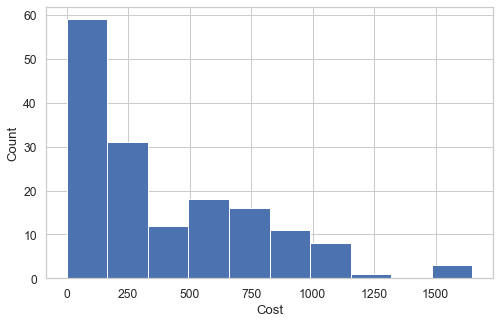

In [4]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bagCostData['Cost'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='Cost', ylabel='Count');

## More than 50% of the bags are priced below Rs 250/- 
## Very few bags cost over Rs 1250/-

In [5]:
attributes=['Cost','Weight', 'Weight1', 'Length', 'Height', 'Width']

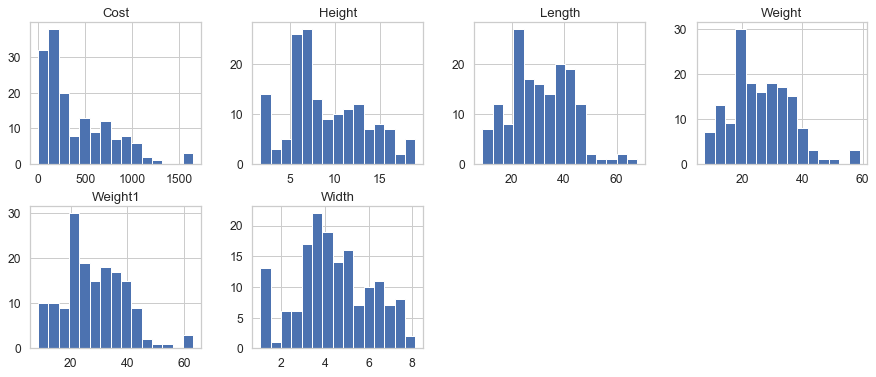

In [6]:
bagCostData[attributes].hist(bins=15, figsize=(15, 6), layout=(2, 4));

## Length, weight and weight1 are skewed right.

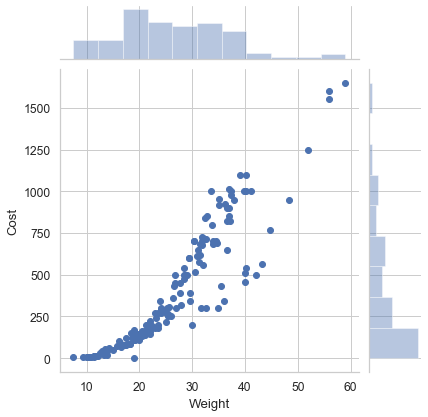

In [7]:
sns.jointplot(x=bagCostData['Weight'], y=bagCostData['Cost']);

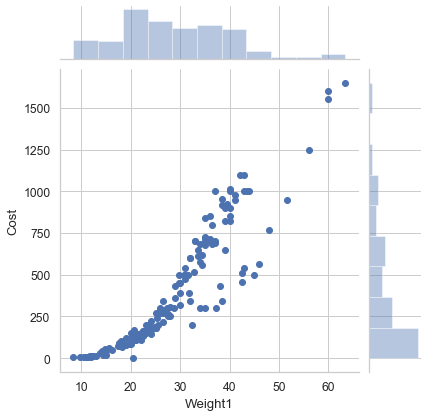

In [8]:
sns.jointplot(x=bagCostData['Weight1'], y=bagCostData['Cost']);


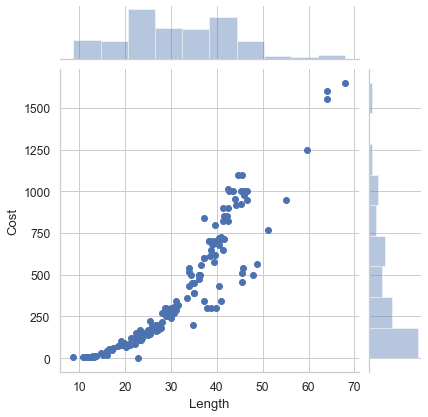

In [9]:
sns.jointplot(x=bagCostData['Length'], y=bagCostData['Cost']);


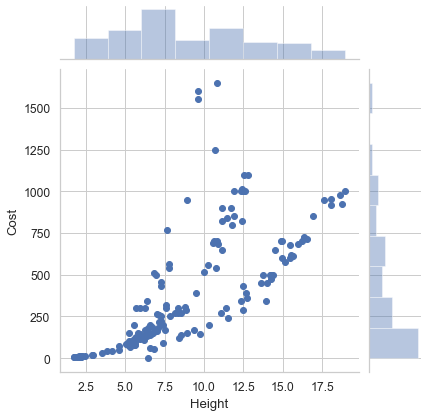

In [10]:
sns.jointplot(x=bagCostData['Height'], y=bagCostData['Cost']);


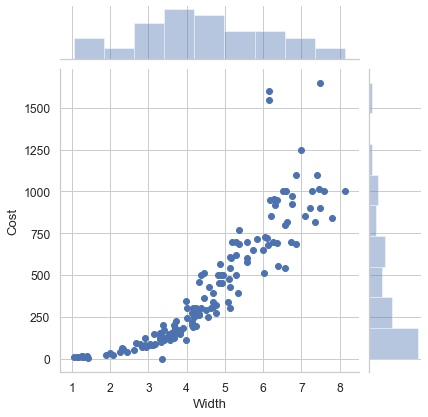

In [11]:
sns.jointplot(x=bagCostData['Width'], y=bagCostData['Cost']);

## Remove outliers

In [12]:
from scipy import stats
import numpy as np

bagCostData.info()
z = np.abs(stats.zscore(bagCostData))
threshold = 3
bagCostData = bagCostData[(z < 3).all(axis=1)]
bagCostData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     156 non-null    float64
 1   Weight   156 non-null    float64
 2   Weight1  156 non-null    float64
 3   Length   156 non-null    float64
 4   Height   156 non-null    float64
 5   Width    156 non-null    float64
dtypes: float64(6)
memory usage: 8.5 KB


## Correlation

In [37]:
corr = bagCostData.corr(method ='pearson')
corr.head()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.895743,0.899759,0.907292,0.801871,0.923432
Weight,0.895743,1.000000,0.999418,0.990612,0.676326,0.889166
Weight1,0.899759,0.999418,1.000000,0.993049,0.691954,0.895584
Length,0.907292,0.990612,0.993049,1.000000,0.756019,0.897053
Height,0.801871,0.676326,0.691954,0.756019,1.000000,0.800542


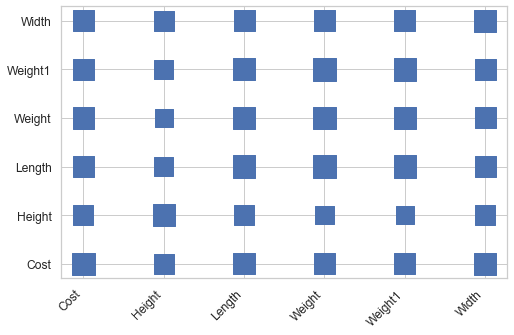

In [14]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## Normalize data

In [15]:
bagCostData.fillna(method ='ffill', inplace = True) 

In [16]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
bagCostData = normalize(bagCostData)
bagCostData.head()

,Cost,Weight,Weight1,Length,Height,Width
0,0.1936,0.352809,0.357143,0.416503,0.568334,0.418978
1,0.2320,0.370787,0.376050,0.440079,0.624055,0.459235
2,0.2720,0.368539,0.380252,0.438114,0.618123,0.514279
3,0.2904,0.422472,0.432773,0.485265,0.638566,0.480365
4,0.3440,0.426966,0.432773,0.495088,0.621966,0.576004


## Split data set

In [17]:
features = ['Weight', 'Weight1','Length', 'Height', 'Width']
from sklearn.model_selection import train_test_split
def splitDataForAnalysis(costData):
    featuresDf = pd.DataFrame(costData, features)
    targetDf = pd.DataFrame(costData, ['Cost'])
    X = costData.loc[:,features]
    y = costData['Cost']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = splitDataForAnalysis(bagCostData)
x_train.head()

,Weight,Weight1,Length,Height,Width
76,0.184270,0.189076,0.190570,0.165980,0.266957
152,0.085393,0.071429,0.084479,0.028180,0.016675
123,0.707865,0.705882,0.703340,0.642641,0.820478
106,0.413483,0.411765,0.404715,0.353598,0.444942
133,0.640449,0.632353,0.632613,0.270922,0.412917


# Multiple linear regression model building

## Sklearn SGDRegressor

In [18]:
numFeatures = len(features)
print(numFeatures)
numThetas = numFeatures + 1

5


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rng = np.random.RandomState(0)
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-6)
clf.fit(x_train, y_train)
print('Intercept = Theta0 = ', clf.intercept_)
print('Coefficients = ', clf.coef_)
y_pred = clf.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error = %.2f" % mean_squared_error(y_test, y_pred))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE = %.2f' % rmse)
print('R2 score = %.2f' % r2_score(y_test, y_pred))

Intercept = Theta0 =  [-0.17062973]
Coefficients =  [0.19572347 0.1961558  0.190901   0.22427875 0.2912955 ]
Mean squared error = 0.01
RMSE = 0.09
R2 score = 0.88


# Gradient descent
Using the dataframe with outlier removed to construct the numpy array
Building model with same training data as Sklearn above (80% of sample)

In [20]:
def getNumpyArray(x_train, y_train):
    X = x_train.to_numpy()
    Y = y_train.to_numpy()
    Y_t = Y.reshape((len(Y),1))
    return X, Y_t

In [21]:
X,Y_t = getNumpyArray(x_train, y_train)
x_train.head()


,Weight,Weight1,Length,Height,Width
76,0.184270,0.189076,0.190570,0.165980,0.266957
152,0.085393,0.071429,0.084479,0.028180,0.016675
123,0.707865,0.705882,0.703340,0.642641,0.820478
106,0.413483,0.411765,0.404715,0.353598,0.444942
133,0.640449,0.632353,0.632613,0.270922,0.412917


In [22]:
def  cal_cost(theta,X,yi):
    tobesummed = np.power(((X @ theta.T)-yi),2)
    return np.sum(tobesummed)/(2 * len(X))

In [23]:
def predict_data(X, theta1):
    y_pred = np.zeros([len(X),1])
    theta = theta1[0]
    i = 0
    for x in X:
        val = theta[0] + (theta[1] * x[1]) + (theta[2] * x[2]) + (theta[3] * x[3]) + (theta[4] * x[4]) + (theta[5] * x[5])
        y_pred[i][0]= val
        i = i + 1
    return y_pred

In [24]:
def calculate_theta(X,yi,theta,learning_rate):
    predicted = predict_data(X, theta)
    m = len(X)
    temp = (1/m) * learning_rate
    newTheta = np.zeros([1,numThetas])
    overallSum = 0
    for i in range(m):
        tempSum = X[i] * (predicted[i] - yi[i][0])
        overallSum += tempSum
    newTheta = theta - (temp * overallSum)
    return newTheta


In [25]:
def my_gradient_descent(X,yi,theta,learning_rate,iterations):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,numThetas))
    minCost = 10000
    minCostIndex = 0

    #Though multiple iterations are run, only the theta corresponding to the min cost is marked as result
    for it in range(iterations):
        theta = calculate_theta(X, yi, theta, learning_rate)
        theta_history[it] = theta
        cost_history[it] = cal_cost(theta, X, yi)
        if cost_history[it] < minCost:
            minCost = cost_history[it]
            minCostIndex = it
        
    return cost_history,theta_history, minCost, minCostIndex

In [40]:
def calculateR2Score(x_test, coefficients):
    print("Intercept & Coefficients: ", coefficients)
    X_test = x_test.to_numpy()
    X_test = np.c_[np.ones((len(X_test),1)),X_test]
    gd_y_pred = predict_data(X_test, coefficients)
    gd_y_test = y_test.to_numpy()
    print('R2 score = %.2f' % r2_score(gd_y_test, gd_y_pred))
    print("Mean squared error = %.2f" % mean_squared_error(gd_y_test, gd_y_pred))
    rmse = sqrt(mean_squared_error(gd_y_test, y_pred))
    print('RMSE = %.2f' % rmse)

In [41]:
#plot the cost
def plotTheCost(cost_history):
    fig, ax = plt.subplots()  
    ax.plot(np.arange(len(cost_history)), cost_history, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training Epoch')  

Intercept & Coefficients:  [[-0.18469291  0.19417534  0.19294367  0.1802832   0.23012441  0.32743399]]
R2 score = 0.88
Mean squared error = 0.01
RMSE = 0.09


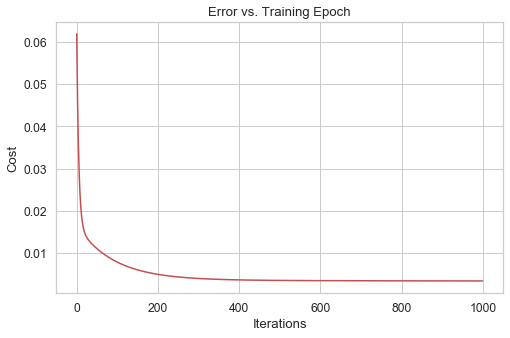

In [42]:
lr =0.05
n_iter = 1000
theta = np.zeros([1,numThetas])
X_b = np.c_[np.ones((len(X),1)),X]
cost_history,theta_history, minCost, minCostIndex = my_gradient_descent(X_b,Y_t,theta,lr,n_iter)
plotTheCost(cost_history)
coefficients = np.array(theta_history[minCostIndex])
coefficients = coefficients.reshape([1,numThetas])
calculateR2Score(x_test, coefficients)

## Stochastic Gradient descent

In [43]:
from sklearn.utils import shuffle

In [44]:
bagCostDataShuffle = shuffle(bagCostData)
X,Y_t = getNumpyArray(x_train, y_train)

In [45]:
def calculate_stochastic_theta(x, actual,theta,learning_rate):
    predicted = theta[0] + (theta[1] * x[1]) + (theta[2] * x[2]) + (theta[3] * x[3]) + (theta[4] * x[4]) + (theta[5] * x[5])
    m = len(X)
    temp = (1/m) * learning_rate
    newTheta = np.zeros([1,numThetas])
    tempSum = x * (predicted - actual)
    newTheta = theta - (temp * tempSum)
    newTheta = newTheta.reshape([1,numThetas])
    return newTheta

In [46]:
def my_stochastic_gradient_descent(X, yi, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,numThetas))
    minCost = 10000
    minCostIndex = 0
    epsilon = 0.0001
    isConverged = False
    for iteration in range(iterations):
        for it in range(len(X)):
            theta = calculate_stochastic_theta(X[it], yi[it][0], theta[0], learning_rate)
            theta_history[it] = theta
            cost_history[it] = cal_cost(theta, X, yi)

            if cost_history[it] < minCost:
                minCost = cost_history[it]
                minCostIndex = it

            if isConverged is True:
                continue            
            if it > 0 and (cost_history[it - 1] - cost_history[it] < epsilon):
                print("convergence reached")
                isConverged = True;
        
    return cost_history,theta_history, minCost, minCostIndex

convergence reached
Intercept & Coefficients:  [[-0.069493    0.16389466  0.16487368  0.16536288  0.17648232  0.21423418]]
R2 score = 0.82
Mean squared error = 0.01
RMSE = 0.09


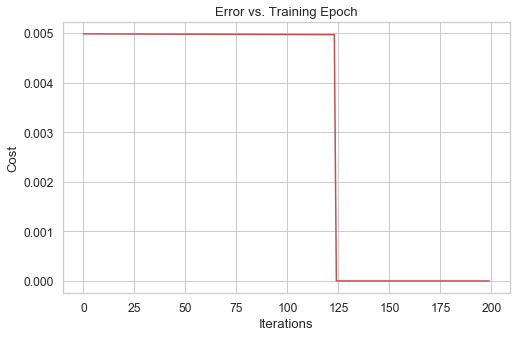

In [47]:
lr =0.05
n_iter = 200
theta = np.zeros([1,numThetas])
X_b = np.c_[np.ones((len(X),1)),X]
cost_history,theta_history, minCost, minCostIndex = my_stochastic_gradient_descent(X_b,Y_t,theta,lr, n_iter)
coefficients = theta_history[minCostIndex]
plotTheCost(cost_history)
calculateR2Score(x_test, coefficients.reshape([1,6]))

## Mini batch gradient descent

In [48]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [49]:
def mini_batch_gradient_descent(X,yi,theta,learning_rate, iterations, batchSize):       
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, numThetas))
    minCost = 10000
    minCostIndex = 0
    epsilon = 0.0001
    isConverged = False

    for it in range(iterations):  
        mini_batches = create_mini_batches(X, yi, batchSize)
        for mini_batch in mini_batches:
            batchX = mini_batch[0]
            batchY = mini_batch[1]
            if batchX.size == 0:
                break
            theta = calculate_theta(batchX, batchY, theta, learning_rate)
            theta_history[it] = theta
            cost_history[it] = cal_cost(theta, X, yi) 
            if cost_history[it] < minCost:
                minCost = cost_history[it]
                minCostIndex = it

            if isConverged is True:
                continue            
            if it > 0 and (cost_history[it - 1] - cost_history[it] < epsilon):
                print("convergence reached")
                isConverged = True;
            
    return cost_history,theta_history, minCost, minCostIndex
        

convergence reached
Intercept & Coefficients:  [[-0.18625847  0.19185718  0.18979864  0.17383309  0.22841574  0.33895378]]
R2 score = 0.88
Mean squared error = 0.01
RMSE = 0.09


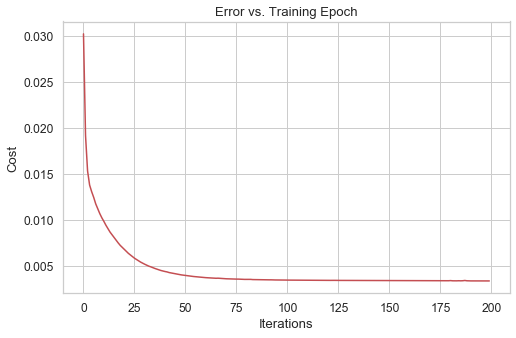

In [50]:
X,y_t = getNumpyArray(x_train, y_train)
lr =0.05
n_iter = 200
batchSize=25
theta = np.zeros([1,numThetas])
X_b = np.c_[np.ones((len(X),1)),X]
cost_history,theta_history, minCost, minCostIndex = mini_batch_gradient_descent(X_b,Y_t,theta,lr, n_iter, batchSize)
coefficients = theta_history[minCostIndex]
plotTheCost(cost_history)
calculateR2Score(x_test, coefficients.reshape([1,6]))